In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train=pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')
test=pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')

Load the Train and the Test Dataset.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  total_amount           175000 non-nu

In [5]:
train.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,175000.000000,168923.000000,175000.000000,168923.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,175000.000000,168923.000000,168923.000000
mean,0.728377,1.357678,5.145930,1.518307,132.710349,132.701429,1.932143,6.127497,0.646816,0.979689,29.633901,2.246971,0.158825
std,0.445606,0.891283,394.971052,6.514678,76.148799,76.192493,1.948497,4.610834,2.328274,0.198775,25.425206,0.819216,0.511968
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-7.500000,0.000079,-29.300000,-1.000000,-576.750000,-2.500000,-1.750000
25%,0.000000,1.000000,1.080000,1.000000,67.000000,67.000000,0.000000,3.473321,0.000000,1.000000,16.300000,2.500000,0.000000
50%,1.000000,1.000000,1.840000,1.000000,133.000000,133.000000,1.000000,5.286217,0.000000,1.000000,21.450000,2.500000,0.000000
75%,1.000000,1.000000,3.610000,1.000000,199.000000,199.000000,2.500000,7.502746,0.000000,1.000000,31.800000,2.500000,0.000000
max,2.000000,9.000000,135182.060000,99.000000,264.000000,264.000000,11.750000,484.876151,80.000000,1.000000,587.250000,2.500000,1.750000


<Axes: >

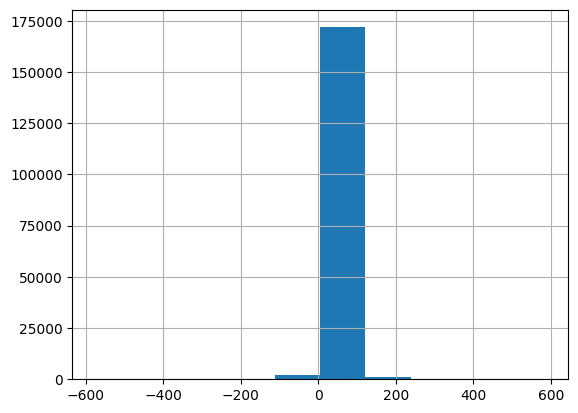

In [6]:
train.total_amount.hist()

In [7]:
train['tpep_pickup_datetime']=pd.to_datetime(train['tpep_pickup_datetime'])
test['tpep_pickup_datetime']=pd.to_datetime(test['tpep_pickup_datetime'])
train['tpep_dropoff_datetime']=pd.to_datetime(train['tpep_dropoff_datetime'])
test['tpep_dropoff_datetime']=pd.to_datetime(test['tpep_dropoff_datetime'])

# Converting the String Datatype to Pandas datetime datatype.

In [8]:
train['date']=train.tpep_pickup_datetime.dt.day
test['date']=test.tpep_pickup_datetime.dt.day
train['month']=train.tpep_pickup_datetime.dt.month
test['month']=test.tpep_pickup_datetime.dt.month
train['pickup_hour']=train.tpep_pickup_datetime.dt.hour
test['pickup_hour']=test.tpep_pickup_datetime.dt.hour
train['pickup_munite']=train.tpep_pickup_datetime.dt.minute
test['pickup_munite']=test.tpep_pickup_datetime.dt.minute
train['pickup_second']=train.tpep_pickup_datetime.dt.second
test['pickup_second']=test.tpep_pickup_datetime.dt.second

# Separating the month,day,hour,munite and second from datetime datatype.

In [9]:
train['time_taken_for_ride']=(train['tpep_dropoff_datetime']-train['tpep_pickup_datetime']).abs()
test['time_taken_for_ride']=(test['tpep_dropoff_datetime']-test['tpep_pickup_datetime']).abs()

# Due to unknown reason the time taken for ride is negative for some datapoints which should always be posetive.so,we took the absolute value.

In [10]:
train['time_taken_for_ride']=train['time_taken_for_ride'].dt.total_seconds()
test['time_taken_for_ride']=test['time_taken_for_ride'].dt.total_seconds()

Converting the time stamp to seconds.

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               175000 non-null  int64         
 1   tpep_pickup_datetime   175000 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  175000 non-null  datetime64[ns]
 3   passenger_count        168923 non-null  float64       
 4   trip_distance          175000 non-null  float64       
 5   RatecodeID             168923 non-null  float64       
 6   store_and_fwd_flag     168923 non-null  object        
 7   PULocationID           175000 non-null  int64         
 8   DOLocationID           175000 non-null  int64         
 9   payment_type           175000 non-null  object        
 10  extra                  175000 non-null  float64       
 11  tip_amount             175000 non-null  float64       
 12  tolls_amount           175000 non-null  floa

In [12]:
train=train.drop('tpep_pickup_datetime',axis=1)
test=test.drop('tpep_pickup_datetime',axis=1)
train=train.drop('tpep_dropoff_datetime',axis=1)
test=test.drop('tpep_dropoff_datetime',axis=1)

# Dropping the pickup and dropoff columns as we already separated date,time,month.

In [13]:
x=train.drop('total_amount',axis=1)
y=train['total_amount']

Separating the feature matrix and label matrix

In [14]:
train['store_and_fwd_flag'].unique(),train['payment_type'].unique()

(array(['N', nan, 'Y'], dtype=object),
 array(['Credit Card', 'Cash', 'Wallet', 'UPI', 'unknown'], dtype=object))

In [15]:
train.isna().sum()

VendorID                    0
passenger_count          6077
trip_distance               0
RatecodeID               6077
store_and_fwd_flag       6077
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6077
Airport_fee              6077
date                        0
month                       0
pickup_hour                 0
pickup_munite               0
pickup_second               0
time_taken_for_ride         0
dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_validation,y_train,y_validation=train_test_split(x,y,test_size=0.2)

Splitting the train data into train and validation data.

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [18]:
trf1=[('Si_mean',SimpleImputer(strategy='mean'),['passenger_count','congestion_surcharge','Airport_fee']),
    ('Si_most_frequent',SimpleImputer(strategy='most_frequent'),['RatecodeID','store_and_fwd_flag'])]
#imputation
ct1=ColumnTransformer(transformers=trf1,remainder='passthrough',verbose_feature_names_out=False).set_output(transform='pandas')
ct1

ColumnTransformer(remainder='passthrough',
                  transformers=[('Si_mean', SimpleImputer(),
                                 ['passenger_count', 'congestion_surcharge',
                                  'Airport_fee']),
                                ('Si_most_frequent',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['RatecodeID', 'store_and_fwd_flag'])],
                  verbose_feature_names_out=False)

In [19]:
trf2=[('ohe',OneHotEncoder(sparse_output=False),['store_and_fwd_flag','payment_type'])]
#categorical to numerical
ct2=ColumnTransformer(transformers=trf2,remainder='passthrough',verbose_feature_names_out=False).set_output(transform='pandas')
ct2

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe', OneHotEncoder(sparse_output=False),
                                 ['store_and_fwd_flag', 'payment_type'])],
                  verbose_feature_names_out=False)

In [20]:
stp=[('remove Null Values',ct1),
     ('categorical to numerical',ct2)]
pipe=Pipeline(steps=stp)
pipe

Pipeline(steps=[('remove Null Values',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Si_mean', SimpleImputer(),
                                                  ['passenger_count',
                                                   'congestion_surcharge',
                                                   'Airport_fee']),
                                                 ('Si_most_frequent',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['RatecodeID',
                                                   'store_and_fwd_flag'])],
                                   verbose_feature_names_out=False)),
                ('categorical to numerical',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['store_and_fwd_flag',
                                                   'payment_type'])],
                                   verbose_feature_names_out=False))])

Creating the full pipeline.

In [21]:
x_processed_train=pipe.fit_transform(x_train)
x_processed_validation=pipe.fit_transform(x_validation)
test_processed=pipe.fit_transform(test)

In [22]:
x_processed_train

,store_and_fwd_flag_N,store_and_fwd_flag_Y,payment_type_Cash,payment_type_Credit Card,payment_type_UPI,payment_type_Wallet,payment_type_unknown,passenger_count,congestion_surcharge,Airport_fee,...,extra,tip_amount,tolls_amount,improvement_surcharge,date,month,pickup_hour,pickup_munite,pickup_second,time_taken_for_ride
91369,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,2.5,0.0,...,2.5,8.617944,0.00,1.0,29,6,17,20,56,3762.0
37032,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,2.5,0.0,...,2.5,6.892717,0.00,1.0,28,6,16,21,16,5490.0
124955,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.5,0.0,...,0.0,5.414703,0.00,1.0,29,6,13,36,3,846.0
74681,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.5,0.0,...,1.0,9.479999,0.00,1.0,28,6,22,30,13,3463.0
145867,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-2.5,0.0,...,-1.0,1.687838,0.00,-1.0,30,6,0,9,42,5139.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167885,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.5,0.0,...,0.0,5.243786,0.00,1.0,29,6,13,9,1,3032.0
154591,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.5,0.0,...,1.0,5.422188,0.00,1.0,30,6,0,41,44,963.0
165643,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.5,0.0,...,5.0,14.098857,6.55,1.0,29,6,10,53,50,2050.0
89240,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,2.829584,0.00,1.0,30,6,14,42,41,637.0


In [23]:
x_processed_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140000 entries, 91369 to 71535
Data columns (total 25 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   store_and_fwd_flag_N      140000 non-null  float64
 1   store_and_fwd_flag_Y      140000 non-null  float64
 2   payment_type_Cash         140000 non-null  float64
 3   payment_type_Credit Card  140000 non-null  float64
 4   payment_type_UPI          140000 non-null  float64
 5   payment_type_Wallet       140000 non-null  float64
 6   payment_type_unknown      140000 non-null  float64
 7   passenger_count           140000 non-null  float64
 8   congestion_surcharge      140000 non-null  float64
 9   Airport_fee               140000 non-null  float64
 10  RatecodeID                140000 non-null  object 
 11  VendorID                  140000 non-null  int64  
 12  trip_distance             140000 non-null  float64
 13  PULocationID              140000 non-null  int

In [24]:
x_processed_train['RatecodeID']=x_processed_train['RatecodeID'].astype('float')
x_processed_validation['RatecodeID']=x_processed_validation['RatecodeID'].astype('float')
test_processed['RatecodeID']=test_processed['RatecodeID'].astype('float')

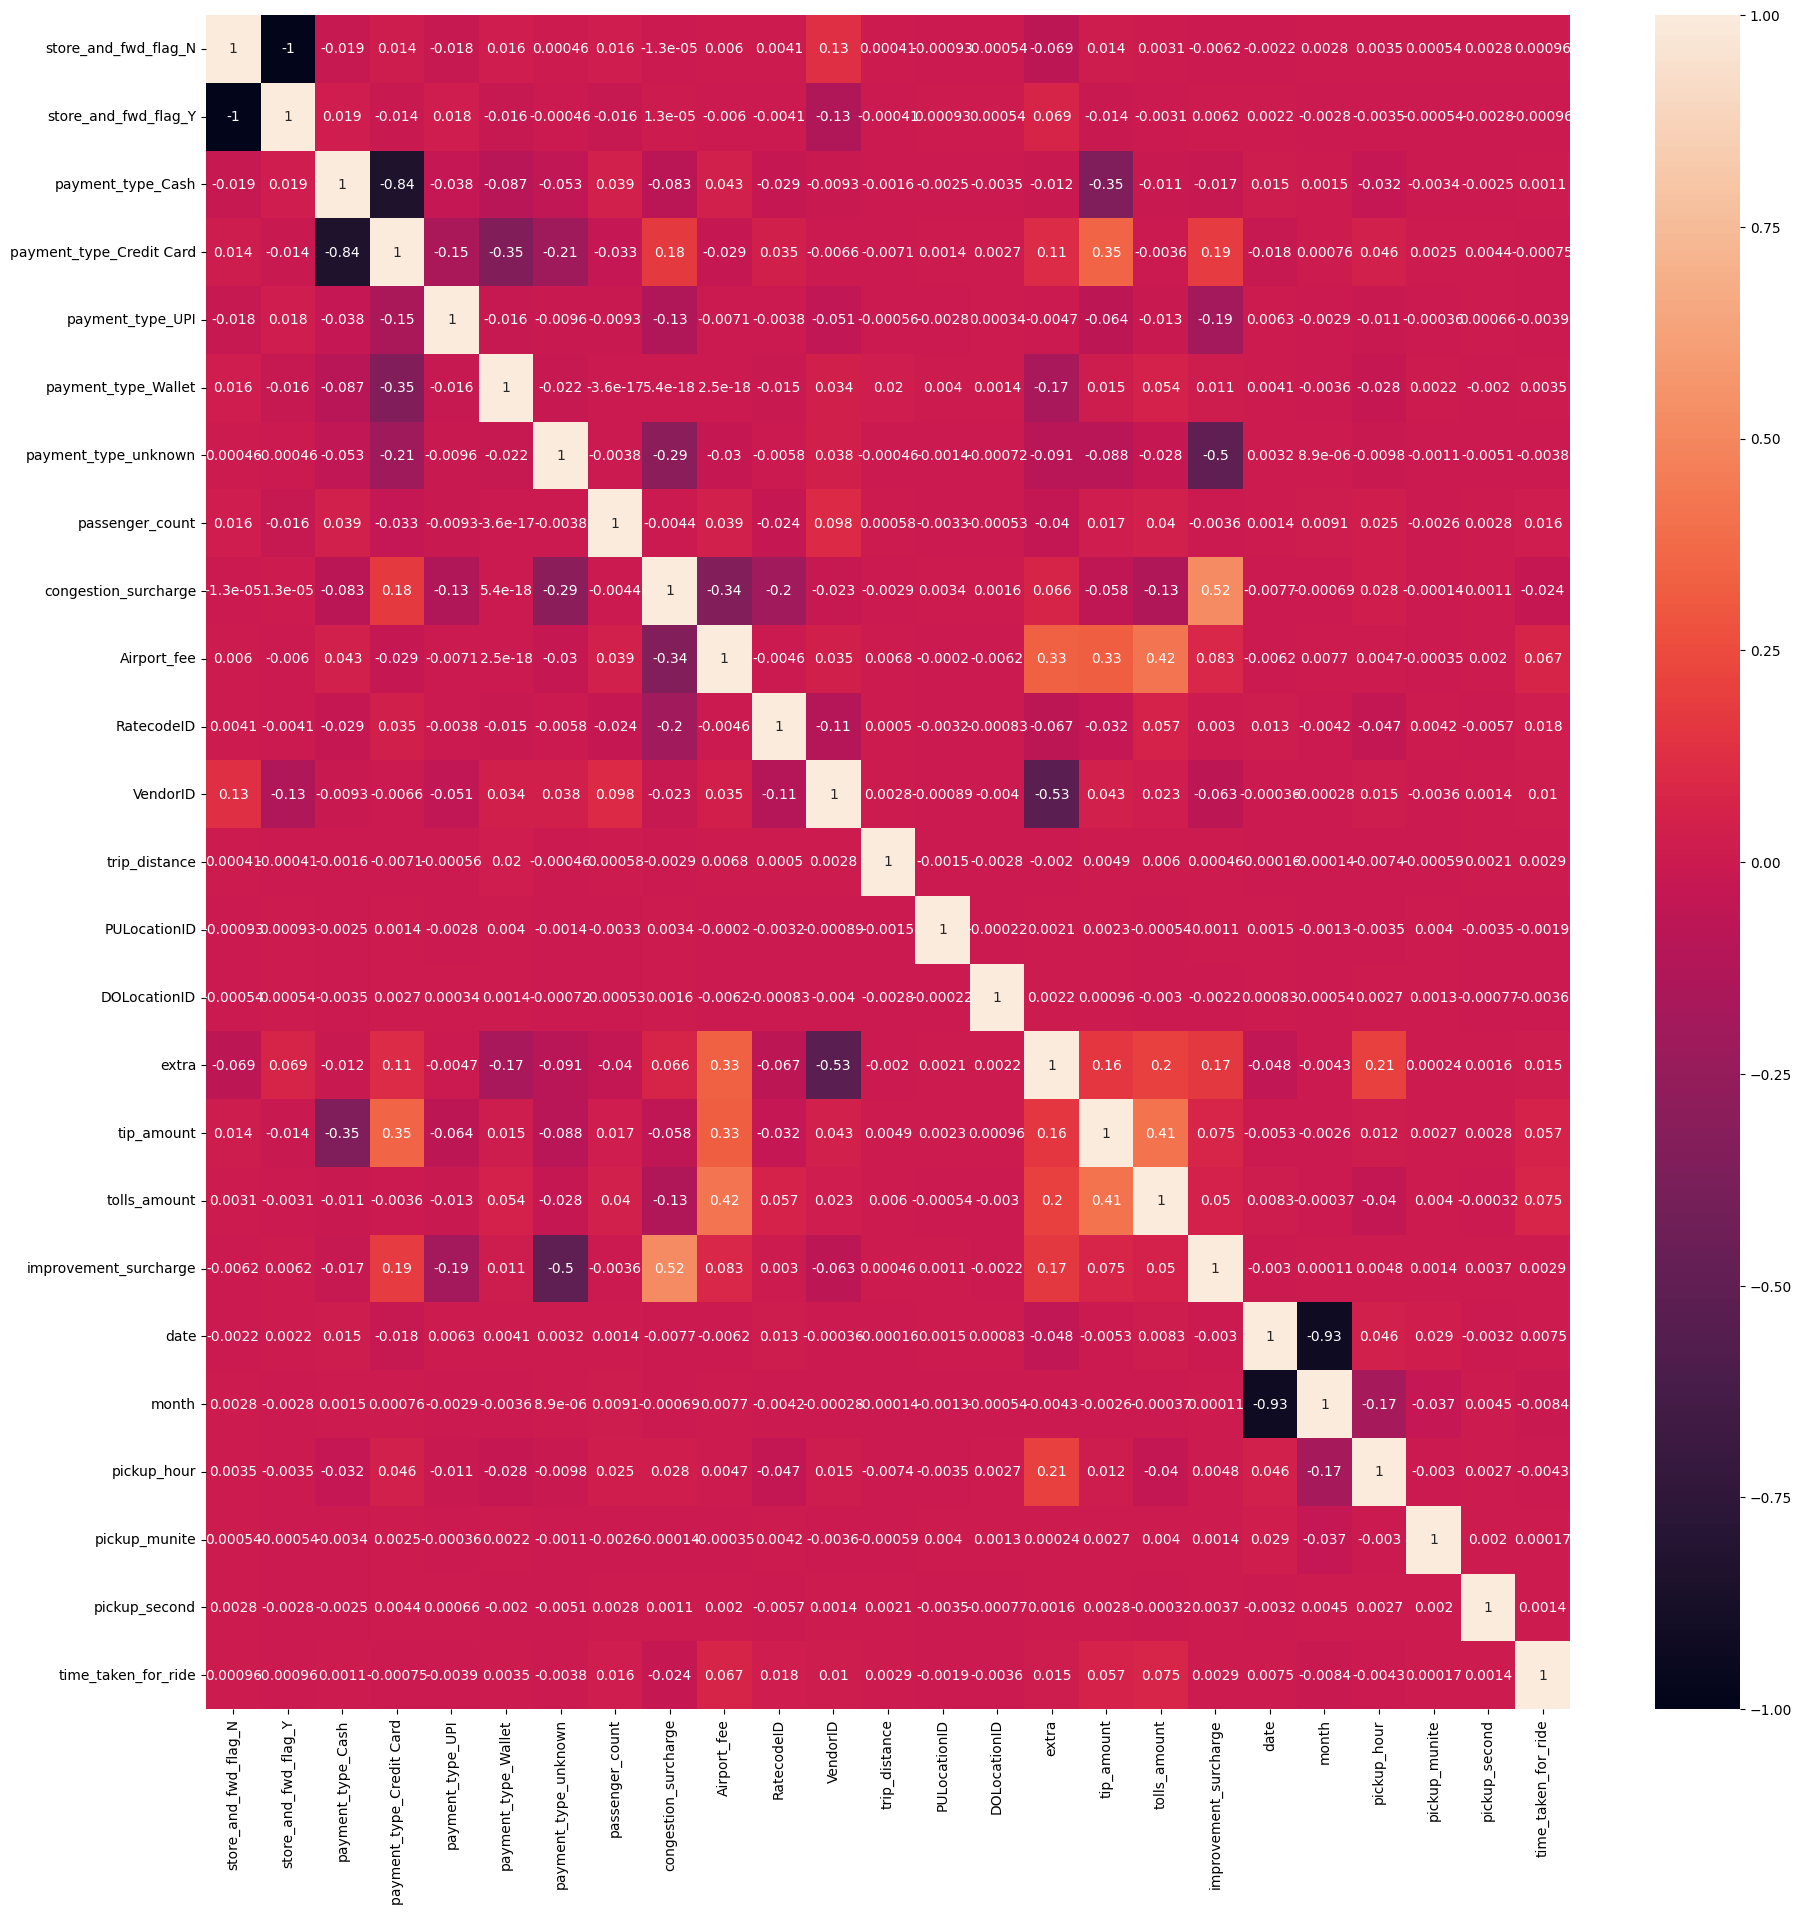

In [25]:
corr_mat=x_processed_train.corr()
plt.figure(figsize=(22,22))
sns.heatmap(corr_mat,annot=True)
plt.show()

In [26]:
x_processed_train_1=x_processed_train.copy()
x_processed_validation_1=x_processed_validation.copy()

In [27]:
columns=x_processed_train_1.columns

In [28]:
from sklearn.metrics import r2_score

**LinearRegression**

In [29]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [30]:
lr.fit(x_processed_train,y_train)

LinearRegression()

In [31]:
r2_score(y_train,lr.predict(x_processed_train)),r2_score(y_validation,lr.predict(x_processed_validation))

(0.7247454066002432, 0.7317477192324053)

In [32]:
Linear_regression_r2=r2_score(y_validation,lr.predict(x_processed_validation))

**KNN Regressor with Scaling.**

In [33]:
from sklearn.preprocessing import StandardScaler

for col in x_processed_train_1:
    ss=StandardScaler()
    x_processed_train_1[col]=ss.fit_transform(x_processed_train_1[[col]])
    
for col in x_processed_validation_1:
    ss=StandardScaler()
    x_processed_validation_1[col]=ss.fit_transform(x_processed_validation_1[[col]])

In [34]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
from sklearn.model_selection import GridSearchCV
param_grid=[
    {'n_neighbors':[8,9,10,11,12,13,14,15]}
]

In [35]:
knn.fit(x_processed_train_1,y_train)

KNeighborsRegressor()

In [36]:
r2_score(y_train,knn.predict(x_processed_train_1)), r2_score(y_validation,knn.predict(x_processed_validation_1))

(0.8331035572121515, 0.7514125720595481)

In [37]:
grid=GridSearchCV(knn,param_grid=param_grid)
grid.fit(x_processed_train_1,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [8, 9, 10, 11, 12, 13, 14, 15]}])

In [38]:
grid.best_params_

{'n_neighbors': 14}

In [39]:
r2_score(y_train,grid.predict(x_processed_train_1)), r2_score(y_validation,grid.predict(x_processed_validation_1))

(0.7921234203243004, 0.76818609682085)

In [40]:
knn_regressor_r2=r2_score(y_validation,grid.predict(x_processed_validation_1))

**DecissionTree**

In [41]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()

In [42]:
dt.fit(x_processed_train,y_train)

DecisionTreeRegressor()

In [43]:
r2_score(y_train,dt.predict(x_processed_train)), r2_score(y_validation,dt.predict(x_processed_validation))

(1.0, 0.8811461133043531)

Overfitting the model.

In [44]:
param_grid = {"max_depth":[4,6,7]}
grid = GridSearchCV(dt,param_grid, scoring="r2",cv=5)

In [45]:
grid.fit(x_processed_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [4, 6, 7]}, scoring='r2')

In [46]:
grid.best_params_

{'max_depth': 7}

In [47]:
r2_score(y_train,grid.predict(x_processed_train)), r2_score(y_validation,grid.predict(x_processed_validation))

(0.9264114747960099, 0.9150260233079932)

In [48]:
Decission_tree_r2=r2_score(y_validation,grid.predict(x_processed_validation))

**XGBoostRegressor**

In [49]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(x_processed_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [50]:
r2_score(y_train,xgb.predict(x_processed_train)), r2_score(y_validation,xgb.predict(x_processed_validation))

(0.9783480892873652, 0.9271119743813553)

In [51]:
XGB_r2=r2_score(y_validation,xgb.predict(x_processed_validation))

**RandomForestRegressor**

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
rfr=RandomForestRegressor()

In [54]:
rfr.fit(x_processed_train,y_train)

RandomForestRegressor()

In [55]:
r2_score(y_train,rfr.predict(x_processed_train)), r2_score(y_validation,rfr.predict(x_processed_validation))

(0.9914390951281009, 0.938450293670611)

In [56]:
param_grid=[{'max_depth':[5,7,9]}]

In [57]:
gcv=GridSearchCV(rfr,param_grid=param_grid,cv=3)

In [58]:
gcv.fit(x_processed_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [5, 7, 9]}])

In [59]:
gcv.best_params_

{'max_depth': 9}

In [60]:
r2_score(y_train,gcv.predict(x_processed_train)), r2_score(y_validation,gcv.predict(x_processed_validation))

(0.9522890185646073, 0.9299006269657698)

In [61]:
random_forest_r2=r2_score(y_validation,gcv.predict(x_processed_validation))

In [62]:
importance=rfr.feature_importances_

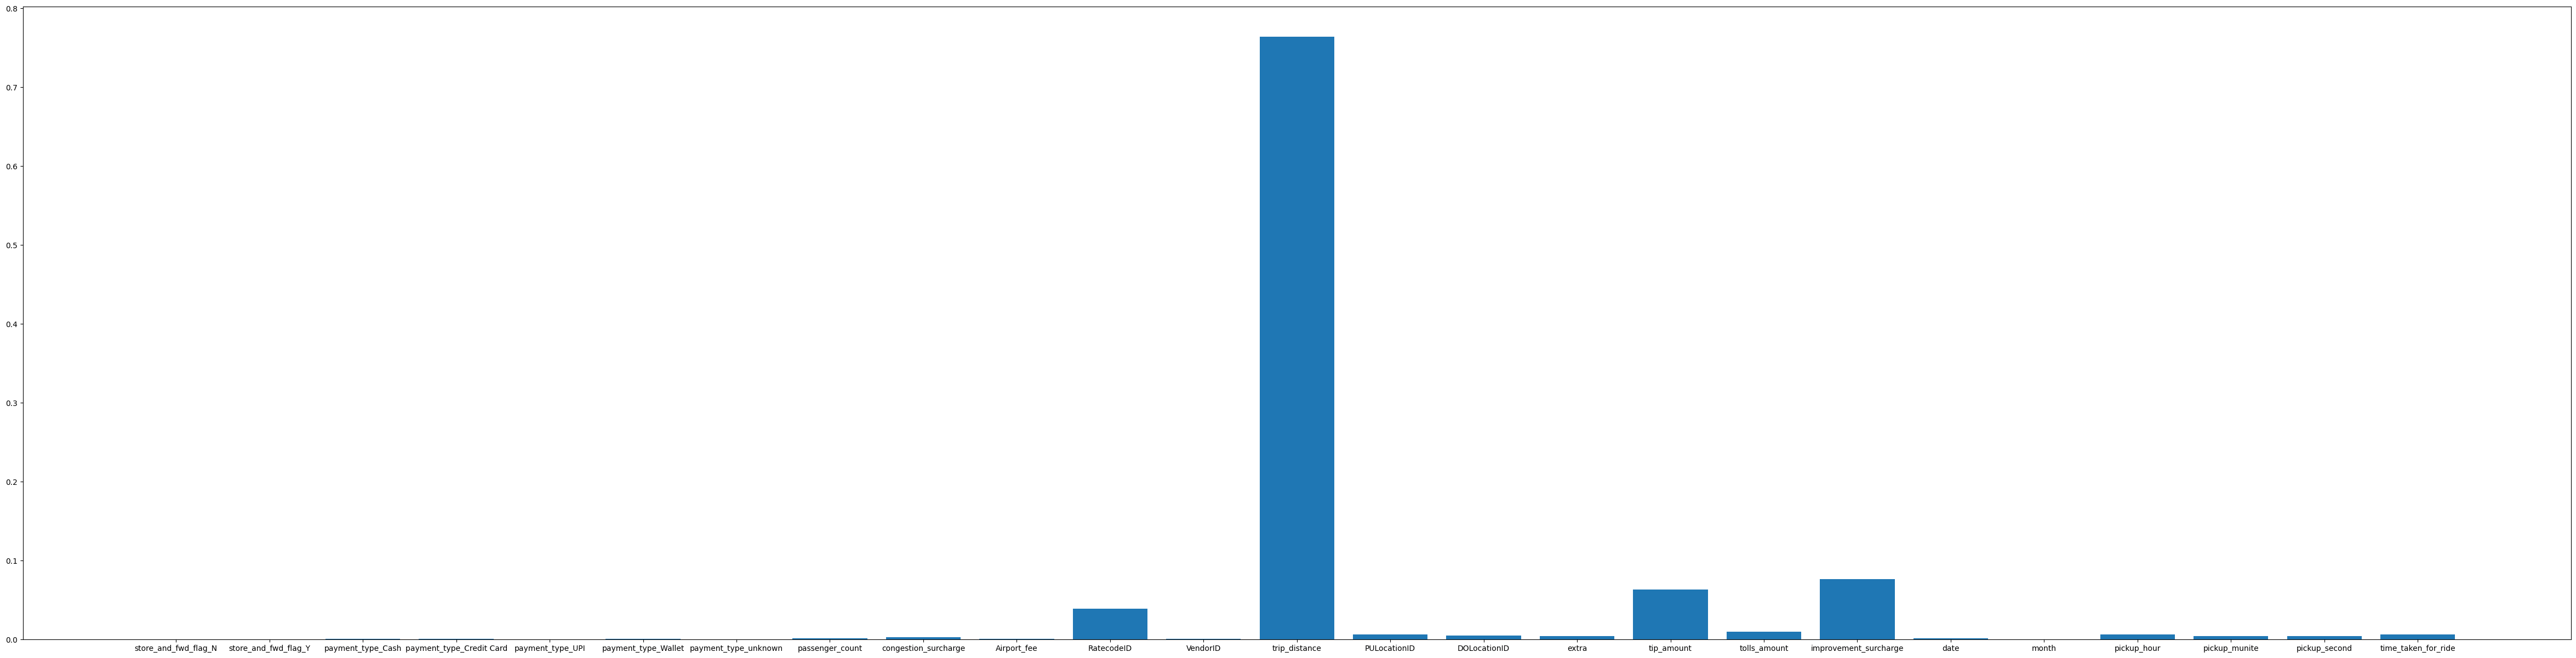

In [63]:
plt.figure(figsize=(60,15))
plt.bar(columns,importance)
plt.show()

# Trip Distance is the most important feature

In [64]:
df=pd.DataFrame({'Linear Regression':[Linear_regression_r2],'knn Regressor':[knn_regressor_r2],'Decission Tree':[Decission_tree_r2],'Xgboost':[XGB_r2],'Rnadom Forest':[random_forest_r2]})
df

,Linear Regression,knn Regressor,Decission Tree,Xgboost,Rnadom Forest
0,0.731748,0.768186,0.915026,0.927112,0.929901


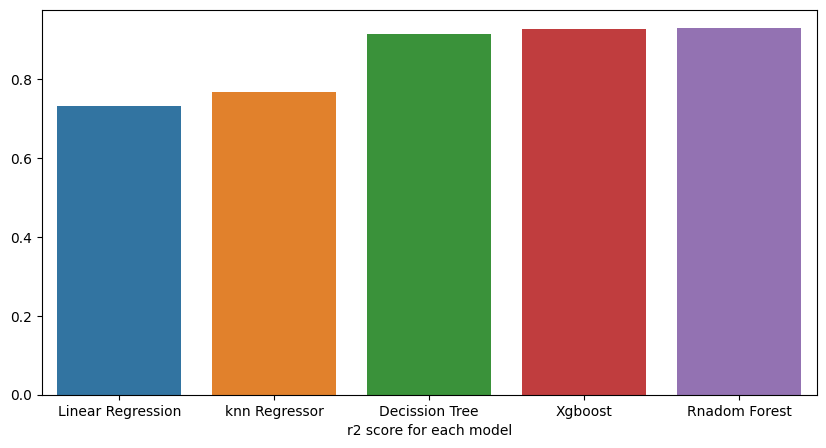

In [65]:
plt.figure(figsize=(10,5))
sns.barplot(df)
plt.xlabel('r2 score for each model')
plt.show()

In [66]:
y_test_pred=rfr.predict(test_processed)

In [67]:
y_test_pred=rfr.predict(test_processed)
submission=pd.DataFrame(columns=['ID','total_ammount'])
submission['ID']=[i for i in range(1,len(y_test_pred)+1)]
submission['total_ammount']=y_test_pred
submission.to_csv('submission.csv',index=False)

# Drop unnecessary features

In [68]:
x_new_train=x_processed_train.drop('store_and_fwd_flag_Y',axis=1)
x_new_train=x_new_train.drop('store_and_fwd_flag_N',axis=1)
x_new_train=x_new_train.drop('month',axis=1)
x_new_train=x_new_train.drop('payment_type_Cash',axis=1)
x_new_train=x_new_train.drop('payment_type_Credit Card',axis=1)
x_new_train=x_new_train.drop('payment_type_UPI',axis=1)
x_new_train=x_new_train.drop('payment_type_Wallet',axis=1)
x_new_train=x_new_train.drop('payment_type_unknown',axis=1)
x_new_train=x_new_train.drop('Airport_fee',axis=1)
x_new_train=x_new_train.drop('VendorID',axis=1)
x_new_train=x_new_train.drop('date',axis=1)

In [69]:
x_new_validation=x_processed_validation.drop('store_and_fwd_flag_Y',axis=1)
x_new_validation=x_new_validation.drop('store_and_fwd_flag_N',axis=1)
x_new_validation=x_new_validation.drop('month',axis=1)
x_new_validation=x_new_validation.drop('payment_type_Cash',axis=1)
x_new_validation=x_new_validation.drop('payment_type_Credit Card',axis=1)
x_new_validation=x_new_validation.drop('payment_type_UPI',axis=1)
x_new_validation=x_new_validation.drop('payment_type_Wallet',axis=1)
x_new_validation=x_new_validation.drop('payment_type_unknown',axis=1)
x_new_validation=x_new_validation.drop('Airport_fee',axis=1)
x_new_validation=x_new_validation.drop('VendorID',axis=1)
x_new_validation=x_new_validation.drop('date',axis=1)

In [70]:
rfr=RandomForestRegressor()
rfr.fit(x_new_train,y_train)

RandomForestRegressor()

In [71]:
r2_score(y_train,rfr.predict(x_new_train)), r2_score(y_validation,rfr.predict(x_new_validation))

(0.9916132904117914, 0.934085504502795)

The r2 score from the original model doesn't differ a lot.So, kept used the original model for prediction.

# take only 5 most important feature

In [72]:
x_new_train_5 = x_new_train.iloc[:, [2,3,7,8,9]]
x_new_validation_5 = x_new_validation.iloc[:, [2,3,7,8,9]]

In [73]:
rfr=RandomForestRegressor()
rfr.fit(x_new_train_5,y_train)

RandomForestRegressor()

In [74]:
r2_score(y_train,rfr.predict(x_new_train_5)), r2_score(y_validation,rfr.predict(x_new_validation_5))

(0.9893506864684476, 0.9173498275114489)

The r2 score reduced from the original model.So, kept the original model.